<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Pr%C3%A1ctica_24_Avances_del_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Limpieza y Transformación de Datos***

***Dataset Inicial:***

In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project/Datasets/LoanData_Raw_v1.0.csv')

print('-------------------------------------------------------------------------')
print('Vista previa del dataset:')
print(df.head(5))

print('-------------------------------------------------------------------------')
print('Cantidad de datos perdidos por columna:')
print(df.isnull().sum())

print('-------------------------------------------------------------------------')
print('Información general del dataset:')
df.info()

print('-------------------------------------------------------------------------')
print('Descripción estadística del dataset:')
print(df.describe())

print('-------------------------------------------------------------------------')
print("Valores únicos en la columna 'default':")
print(df['default'].unique())

print('-------------------------------------------------------------------------')
print("Frecuencia de combinaciones entre 'ed' y 'default':")
print(pd.crosstab(df['ed'], df['default']))

print('-------------------------------------------------------------------------')
df.value_counts(['age'])

-------------------------------------------------------------------------
Vista previa del dataset:
    age   ed  employ  address  income  debtinc   creddebt   othdebt default
0  41.0  3.0      17       12   176.0      9.3  11.359392  5.008608       1
1  27.0  1.0      10        6    31.0     17.3   1.362202  4.000798       0
2  40.0  1.0      15        7     NaN      5.5   0.856075  2.168925       0
3  41.0  NaN      15       14   120.0      2.9   2.658720  0.821280       0
4  24.0  2.0       2        0    28.0     17.3   1.787436  3.056564       1
-------------------------------------------------------------------------
Cantidad de datos perdidos por columna:
age         19
ed          20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
default      0
dtype: int64
-------------------------------------------------------------------------
Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Dat

,count
age,
29.0,43
28.0,37
31.0,36
34.0,33
41.0,33
39.0,33
36.0,28
27.0,27
40.0,27


***Modificación del Dataset:***

In [7]:
# Eliminar registros con datos faltantes.
df = df.dropna()

# Estandarizar la columna 'default' para que solo contenga 0 y 1.
df['default'] = df['default'].replace({"'0'": 0, ":0": 0})

# Estandarizar los tipos de datos.
df['age'] = df['age'].astype(int)
df['ed'] = df['ed'].astype(int)
df['employ'] = df['employ'].astype(int)
df['address'] = df['address'].astype(int)
df['income'] = df['income'].astype(float)
df['debtinc'] = df['debtinc'].astype(float)
df['creddebt'] = df['creddebt'].astype(float)
df['othdebt'] = df['othdebt'].astype(float)
df['default'] = df['default'].astype(int)

# Redondear los valores flotantes a 4 decimales.
df[['income', 'debtinc', 'creddebt', 'othdebt']] = df[['income', 'debtinc', 'creddebt', 'othdebt']].round(4)


# Eliminar el dato atípico de 'age' (136).
df = df[df['age'] != 136]


df.info()
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 625 entries, 0 to 698
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       625 non-null    int64  
 1   ed        625 non-null    int64  
 2   employ    625 non-null    int64  
 3   address   625 non-null    int64  
 4   income    625 non-null    float64
 5   debtinc   625 non-null    float64
 6   creddebt  625 non-null    float64
 7   othdebt   625 non-null    float64
 8   default   625 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 48.8 KB
   age  ed  employ  address  income  debtinc  creddebt  othdebt  default
0   41   3      17       12   176.0      9.3   11.3594   5.0086        1
1   27   1      10        6    31.0     17.3    1.3622   4.0008        0
4   24   2       2        0    28.0     17.3    1.7874   3.0566        1
5   41   2       5        5    25.0     10.2    0.3927   2.1573        0
8   24   1       3        4    19.0     24.4    1.3583  

***Dataset Modificado:***

In [8]:
print('-------------------------------------------------------------------------')
print('Vista previa del dataset:')
print(df.head(5))

print('-------------------------------------------------------------------------')
print('Cantidad de datos perdidos por columna:')
print(df.isnull().sum())

print('-------------------------------------------------------------------------')
print('Información general del dataset:')
df.info()

print('-------------------------------------------------------------------------')
print('Descripción estadística del dataset:')
print(df.describe())

print('-------------------------------------------------------------------------')
print("Valores únicos en la columna 'default':")
print(df['default'].unique())

print('-------------------------------------------------------------------------')
print("Frecuencia de combinaciones entre 'ed' y 'default':")
print(pd.crosstab(df['ed'], df['default']))

print('-------------------------------------------------------------------------')
print(df.value_counts(['default']))
print(df.value_counts(['income']))


-------------------------------------------------------------------------
Vista previa del dataset:
   age  ed  employ  address  income  debtinc  creddebt  othdebt  default
0   41   3      17       12   176.0      9.3   11.3594   5.0086        1
1   27   1      10        6    31.0     17.3    1.3622   4.0008        0
4   24   2       2        0    28.0     17.3    1.7874   3.0566        1
5   41   2       5        5    25.0     10.2    0.3927   2.1573        0
8   24   1       3        4    19.0     24.4    1.3583   3.2777        1
-------------------------------------------------------------------------
Cantidad de datos perdidos por columna:
age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64
-------------------------------------------------------------------------
Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 625 entries, 0 to 698
Data columns (total 9 columns):
 # 

# **EDA, GRÁFICAS, TRANSFORMACIONES Y PROCESOS DE NORMALIZACIÓN**

In [9]:
#===============================================================================
#                          IMPORTACIÓN DE LIBRERÍAS
#===============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, anderson, kstest, boxcox

#===============================================================================
#                    CARGAR EL DATASET LOANSANDLIABILITY
#===============================================================================

df = pd.read_csv('/content/drive/MyDrive/Project/Datasets/LoanData_Raw_v1.0.csv')

#===============================================================================
#                          MODIFICACIÓN DEL DATASET
#===============================================================================


# Eliminar registros con datos faltantes.
df = df.dropna()

# Eliminar el dato atípico de 'age' (136).
df = df[df['age'] != 136]
df = df[df['ed'] != 5]

# Estandarizar la columna 'default' para que solo contenga 0 y 1.
df['default'] = df['default'].replace({"'0'": 0, ":0": 0})

## CATEGORIZANDO LA VARIABLE 'ED'

education_mapping = {
    1: 'High School',
    2: 'Undergraduate',
    3: 'Graduate',
    4: 'Postgraduate'
}

df['ed'] = df['ed'].map(education_mapping)


# Estandarizar los tipos de datos.
df['age'] = df['age'].astype(int)
df['ed'] = df['ed'].astype('category')  #MODIFICAR A CATEGORICA
df['employ'] = df['employ'].astype(int)
df['address'] = df['address'].astype(int)
df['income'] = df['income'].astype(float)
df['debtinc'] = df['debtinc'].astype(float)
df['creddebt'] = df['creddebt'].astype(float)
df['othdebt'] = df['othdebt'].astype(float)
df['default'] = df['default'].astype(int)

# Redondear los valores flotantes a 4 decimales.
df[['income', 'debtinc', 'creddebt', 'othdebt']] = df[['income', 'debtinc', 'creddebt', 'othdebt']].round(4)

#===============================================================================
#                              DATASET MODIFICADO
#===============================================================================

print('-------------------------------------------------------------------------')
print('Vista previa del dataset:')
print(df.head(5))

print('-------------------------------------------------------------------------')
print('Cantidad de datos perdidos por columna:')
print(df.isnull().sum())

print('-------------------------------------------------------------------------')
print('Información general del dataset:')
df.info()

print('-------------------------------------------------------------------------')
print('Descripción estadística del dataset:')
print(df.describe())

print('-------------------------------------------------------------------------')
print("Valores únicos en la columna 'default':")
print(df['default'].unique())

print('-------------------------------------------------------------------------')
print("Frecuencia de combinaciones entre 'ed' y 'default':")
print(pd.crosstab(df['ed'], df['default']))

print('-------------------------------------------------------------------------')
print(df.value_counts(['default']))

print('-------------------------------------------------------------------------')
print(f"Valor mínimo de 'employ': {df['employ'].min()}")
print(f"Valor mínimo de 'address': {df['address'].min()}")


-------------------------------------------------------------------------
Vista previa del dataset:
   age             ed  employ  address  income  debtinc  creddebt  othdebt  \
0   41       Graduate      17       12   176.0      9.3   11.3594   5.0086   
1   27    High School      10        6    31.0     17.3    1.3622   4.0008   
4   24  Undergraduate       2        0    28.0     17.3    1.7874   3.0566   
5   41  Undergraduate       5        5    25.0     10.2    0.3927   2.1573   
8   24    High School       3        4    19.0     24.4    1.3583   3.2777   

   default  
0        1  
1        0  
4        1  
5        0  
8        1  
-------------------------------------------------------------------------
Cantidad de datos perdidos por columna:
age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64
-------------------------------------------------------------------------
Información general del da

--------------------------------------------------------------------------------




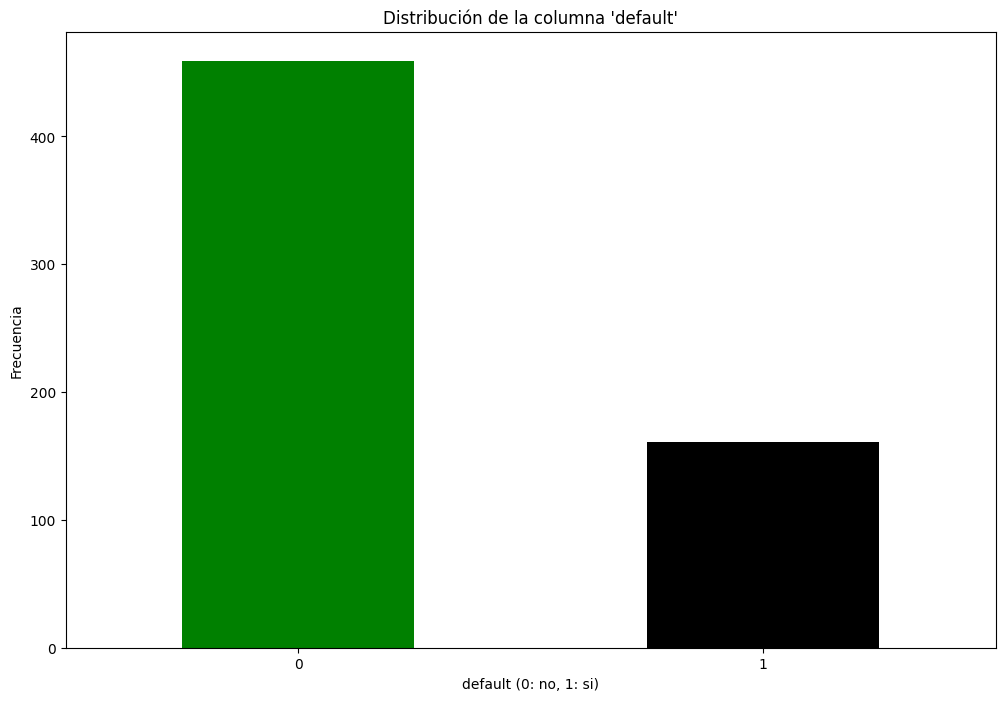



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




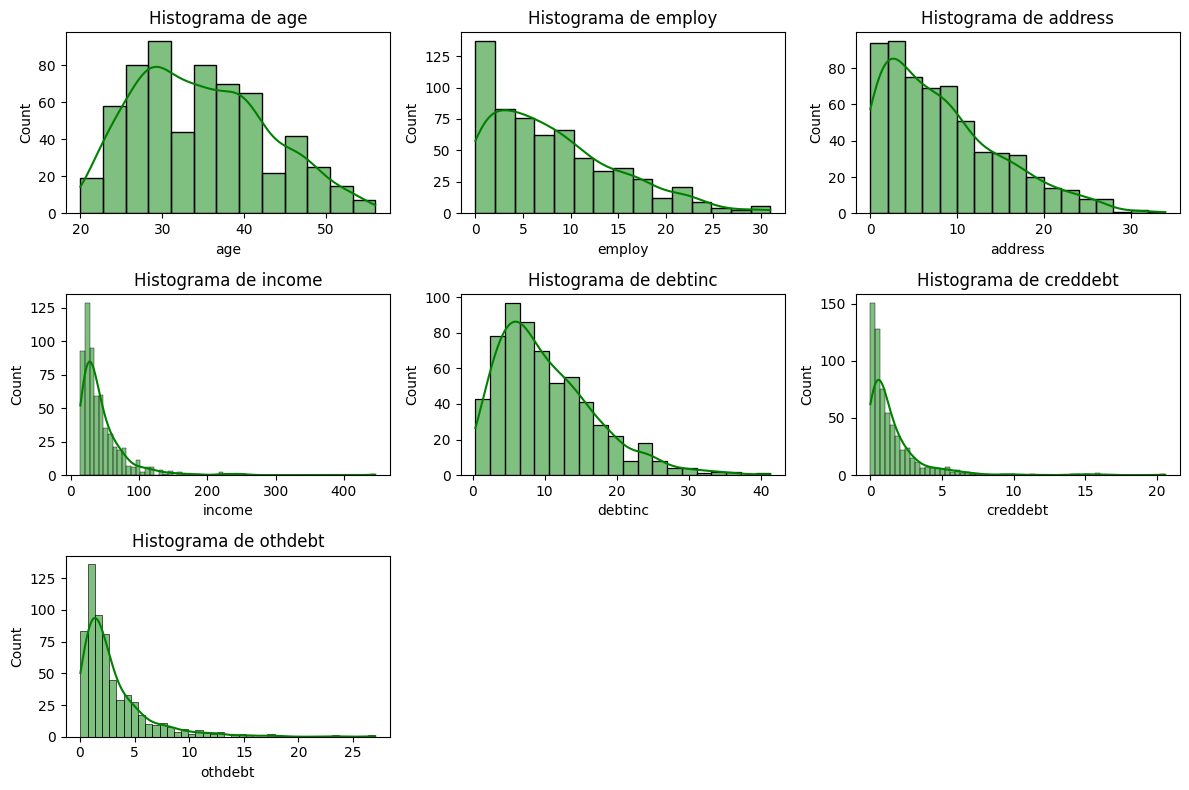



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




,Kurtosis,Skewness
age,-0.608001,0.384387
employ,0.318535,0.895357
address,0.386506,0.949129
income,28.609349,4.089323
debtinc,1.384151,1.106902
creddebt,22.860199,4.018301
othdebt,11.287152,2.751464




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




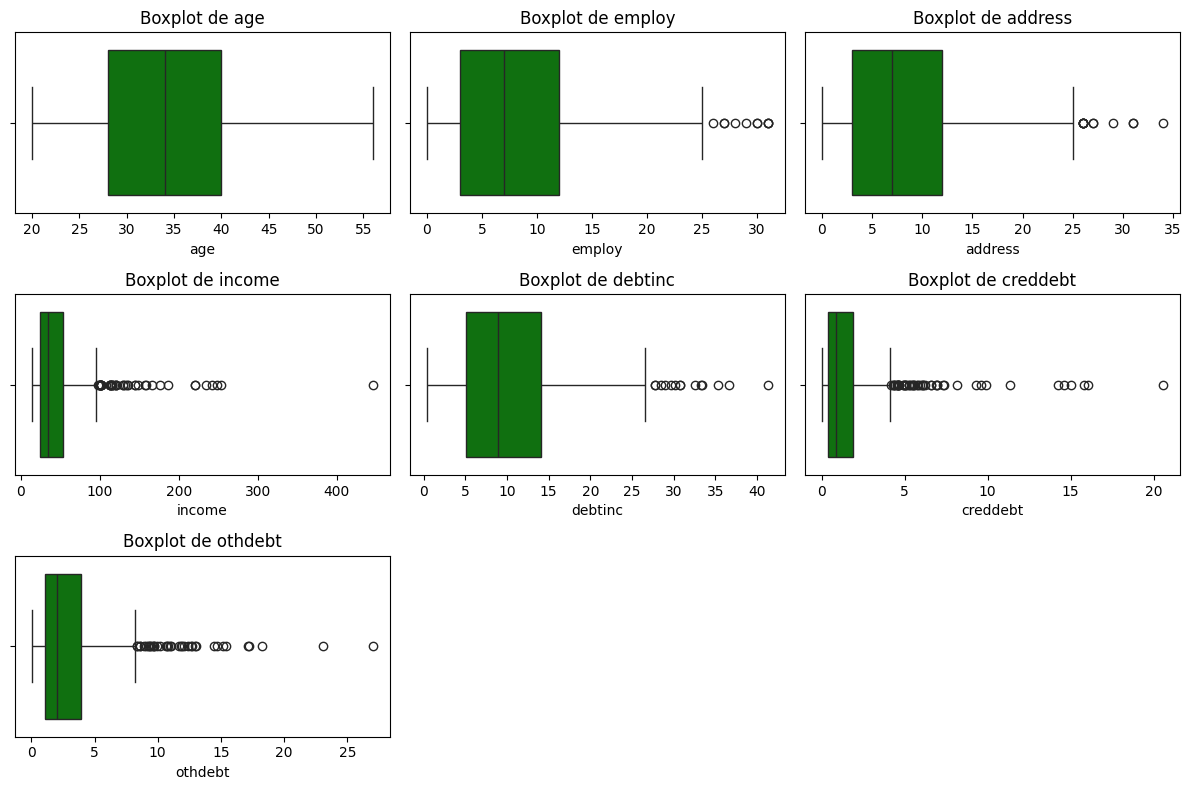



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




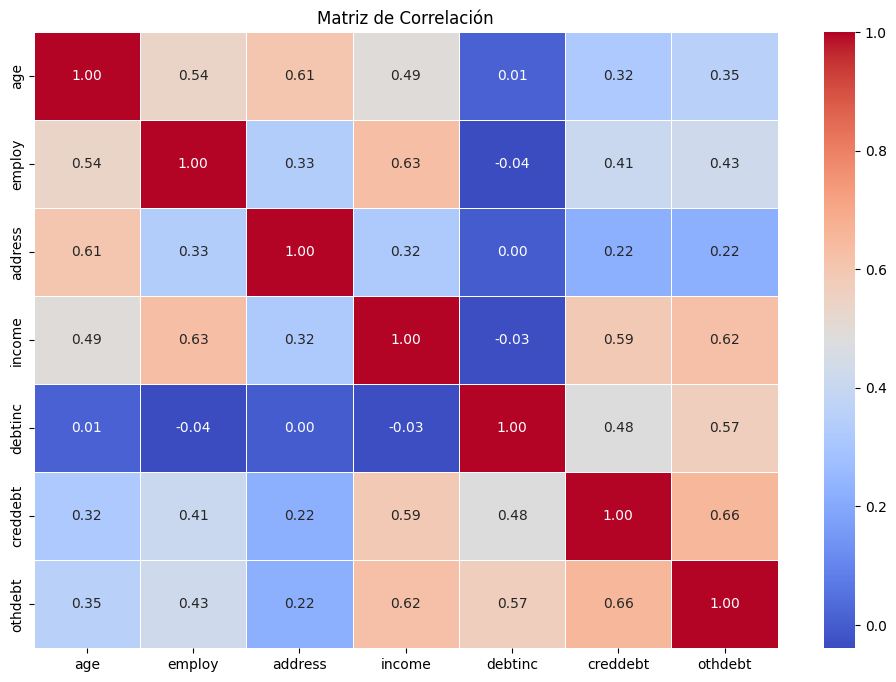



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------



Resultados del Test de Shapiro-Wilk:


,Variable,Estadístico,p-valor
0,age,0.973,0.0
1,employ,0.924,0.0
2,address,0.916,0.0
3,income,0.655,0.0
4,debtinc,0.924,0.0
5,creddebt,0.609,0.0
6,othdebt,0.734,0.0



Resultados de la prueba Anderson-Darling:


,Variable,Estadístico,Nivel de Significancia (%),Valor Crítico
0,age,4.394,15.0,0.572
1,age,4.394,10.0,0.652
2,age,4.394,5.0,0.782
3,age,4.394,2.5,0.912
4,age,4.394,1.0,1.085
5,employ,12.299,15.0,0.572
6,employ,12.299,10.0,0.652
7,employ,12.299,5.0,0.782
8,employ,12.299,2.5,0.912
9,employ,12.299,1.0,1.085



Resultados del Test de Kolmogorov-Smirnov:


,Variable,Estadístico,p-valor
0,age,1.000,0.0
1,employ,0.821,0.0
2,address,0.826,0.0
3,income,1.000,0.0
4,debtinc,0.931,0.0
5,creddebt,0.507,0.0
6,othdebt,0.629,0.0




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




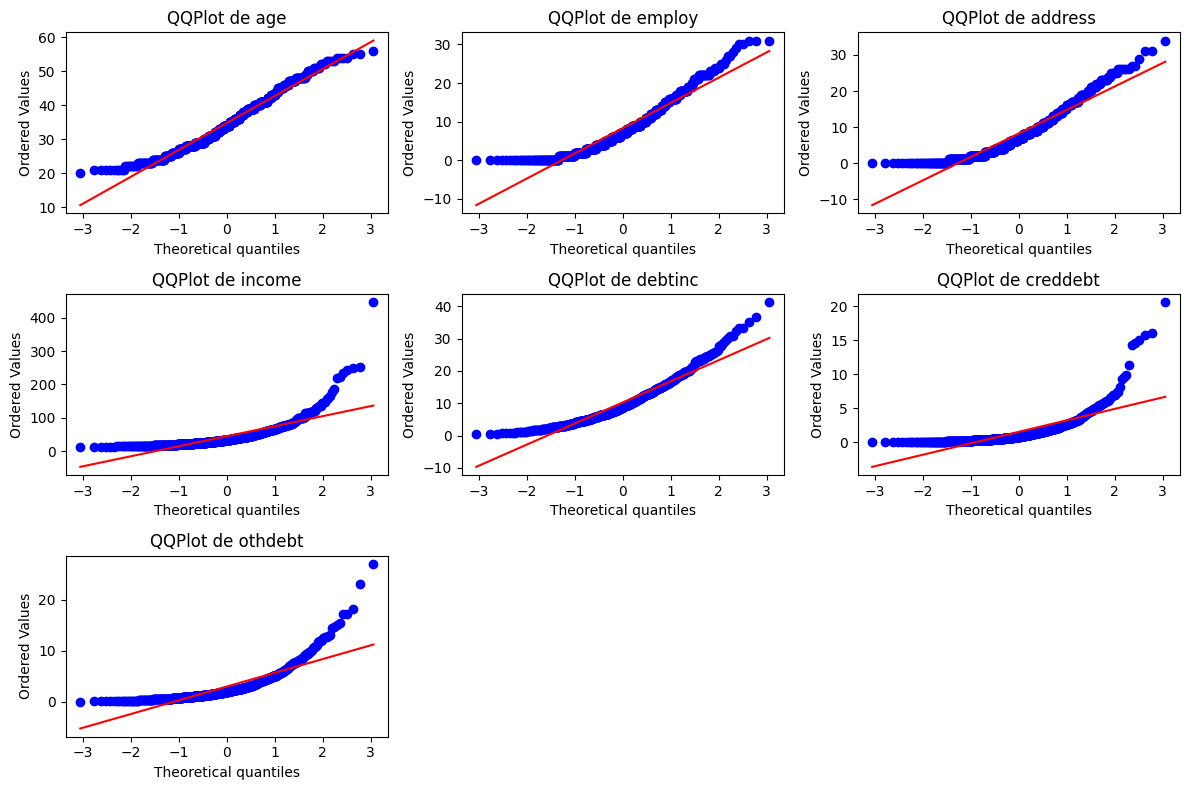



--------------------------------------------------------------------------------


from matplotlib import pyplot as plt
df_shapiro['Estadístico'].plot(kind='hist', bins=20, title='Estadístico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_shapiro.groupby('Variable').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['p-valor']
  ys = series['Estadístico']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_shapiro.sort_values('p-valor', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Variable')):
  _plot_series(series, series_name, i)
  fig.legend(title='Variable', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p-valor')
_ = plt.ylabel('Estadístico')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['p-valor']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'p-valor'}, axis=1)
              .sort_values('p-valor', ascending=True))
  xs = counted['p-valor']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_shapiro.sort_values('p-valor', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Variable')):
  _plot_series(series, series_name, i)
  fig.legend(title='Variable', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p-valor')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_shapiro['Estadístico'].plot(kind='line', figsize=(8, 4), title='Estadístico')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_shapiro['Variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_shapiro, x='Estadístico', y='Variable', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:

# ******************************************************************************

#                       *** REALIZAR UN EDA COMPLETO ***

# ******************************************************************************

#===============================================================================
#            VISUALIZACIÓN: GRÁFICA DE BARRAS PARA COLUMNA ´default´
#===============================================================================

plt.figure(figsize = (12, 8))
df['default'].value_counts().plot(kind = 'bar', color = ['green', 'black'])
plt.title("Distribución de la columna 'default'")
plt.xlabel('default (0: no, 1: si)')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 0)

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#                 VISUALIZACIÓN: HISTOGRAMAS COLUMNAS NUMÉRICAS
#===============================================================================

numerical_columns = df.select_dtypes(include = [np.number]).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'default']


plt.figure(figsize = (12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde = True, color = 'green', edgecolor = 'black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
print('-' * 80)
print('\n')

plt.tight_layout()
plt.show()

print('\n')
print('-' * 80)

kurtosis_values = df[numerical_columns].kurtosis()
skewness_values = df[numerical_columns].skew()

print('-' * 80)
print('\n')

stats_df = pd.DataFrame({'Kurtosis': kurtosis_values, 'Skewness': skewness_values})
display(stats_df)

print('\n')
print('-' * 80)

#===============================================================================
#               VISUALIZACIÓN: BOXPLOTS PARA COLUMNAS NUMÉRICAS
#===============================================================================

plt.figure(figsize = (12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = df, x = col, color = 'green')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#              VISUALIZACIÓN: MATRIZ DE CORRELACIÓN Y MAPA DE CALOR
#===============================================================================

corr = df[numerical_columns].corr()

print('-' * 80)
print('\n')

plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Matriz de Correlación')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#              VISUALIZACIÓN: PAIRPLOT PARA COLUMNAS NUMÉRICAS
#===============================================================================

#sns.pairplot(df[numerical_columns])

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#              PRUEBAS DE NORMALIDAD (SW, AD, KS) Y QQPLOT
#===============================================================================

shapiro_results = {'Variable': [], 'Estadístico': [], 'p-valor': []}
anderson_results = {'Variable': [], 'Estadístico': [], 'Nivel de Significancia (%)': [], 'Valor Crítico': []}
ks_results = {'Variable': [], 'Estadístico': [], 'p-valor': []}

# SHAPIRO-WILK TEST

for col in numerical_columns:
    stat, p_value = shapiro(df[col].dropna())
    shapiro_results['Variable'].append(col)
    shapiro_results['Estadístico'].append(round(stat, 3))
    shapiro_results['p-valor'].append(round(p_value, 3))

df_shapiro = pd.DataFrame(shapiro_results)

# ANDERSON-DARLING TEST

for col in numerical_columns:
    result = anderson(df[col].dropna())
    for i, crit in enumerate(result.critical_values):
        anderson_results['Variable'].append(col)
        anderson_results['Estadístico'].append(round(result.statistic, 3))
        anderson_results['Nivel de Significancia (%)'].append(result.significance_level[i])
        anderson_results['Valor Crítico'].append(round(crit, 3))

df_anderson = pd.DataFrame(anderson_results)

# KOLMOGOROV-SMIRNOV TEST

for col in numerical_columns:
    stat, p_value = kstest(df[col].dropna(), 'norm')
    ks_results['Variable'].append(col)
    ks_results['Estadístico'].append(round(stat, 3))
    ks_results['p-valor'].append(round(p_value, 3))

df_ks = pd.DataFrame(ks_results)

print('-' * 80)
print('\n')

print("\nResultados del Test de Shapiro-Wilk:")
display(df_shapiro)

print("\nResultados de la prueba Anderson-Darling:")
display(df_anderson)

print("\nResultados del Test de Kolmogorov-Smirnov:")
display(df_ks)

print('\n')
print('-' * 80)

# QQPLOTS

plt.figure(figsize = (12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    stats.probplot(df[col].dropna(), dist = 'norm', plot = plt)
    plt.title(f'QQPlot de {col}')

plt.tight_layout()

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)


La columna employ contiene valores negativos, no se puede aplicar la transformación Box-Cox.
La columna address contiene valores negativos, no se puede aplicar la transformación Box-Cox.
La columna employ contiene valores negativos, no se puede aplicar Box-Cox ni realizar pruebas.
La columna address contiene valores negativos, no se puede aplicar Box-Cox ni realizar pruebas.

Resultados Shapiro-Wilk (Original vs. Box-Cox):


,Variable,Estadístico_Original,p_Original,Estadístico_BoxCox,p_BoxCox,Lambda
0,age,0.973,0.0,0.984,0.000,0.062
1,income,0.655,0.0,0.990,0.000,-0.517
2,debtinc,0.924,0.0,0.998,0.563,0.330
3,creddebt,0.609,0.0,0.998,0.847,0.081
4,othdebt,0.734,0.0,0.998,0.810,0.097



Resultados Anderson-Darling (Estadístico):


,Variable,Estadístico_Original,Estadístico_BoxCox,Niveles_Significancia,Valores_Críticos,Interpretación_Original,Interpretación_BoxCox
0,age,4.394,2.423,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz..."
1,income,48.124,1.396,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz..."
2,debtinc,11.207,0.291,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[No rechazar H0, No rechazar H0, No rechazar H..."
3,creddebt,60.802,0.198,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[No rechazar H0, No rechazar H0, No rechazar H..."
4,othdebt,43.015,0.345,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[No rechazar H0, No rechazar H0, No rechazar H..."



Resultados Kolmogorov-Smirnov (Original vs. Box-Cox):


,Variable,Estadístico_Original,p_Original,Estadístico_BoxCox,p_BoxCox,Interpretación_Original,Interpretación_BoxCox
0,age,1.000,0.0,1.000,0.0,Rechazar H0,Rechazar H0
1,income,1.000,0.0,0.925,0.0,Rechazar H0,Rechazar H0
2,debtinc,0.931,0.0,0.809,0.0,Rechazar H0,Rechazar H0
3,creddebt,0.507,0.0,0.102,0.0,Rechazar H0,Rechazar H0
4,othdebt,0.629,0.0,0.280,0.0,Rechazar H0,Rechazar H0


--------------------------------------------------------------------------------




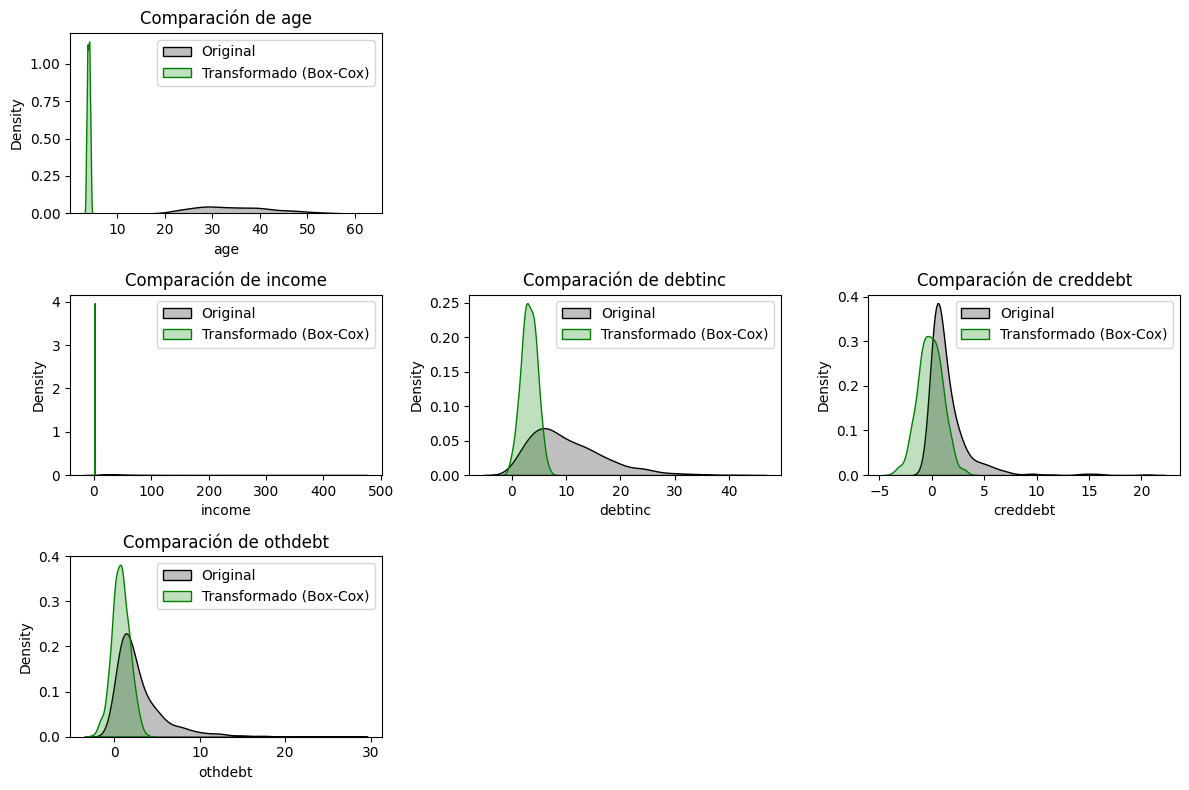

--------------------------------------------------------------------------------




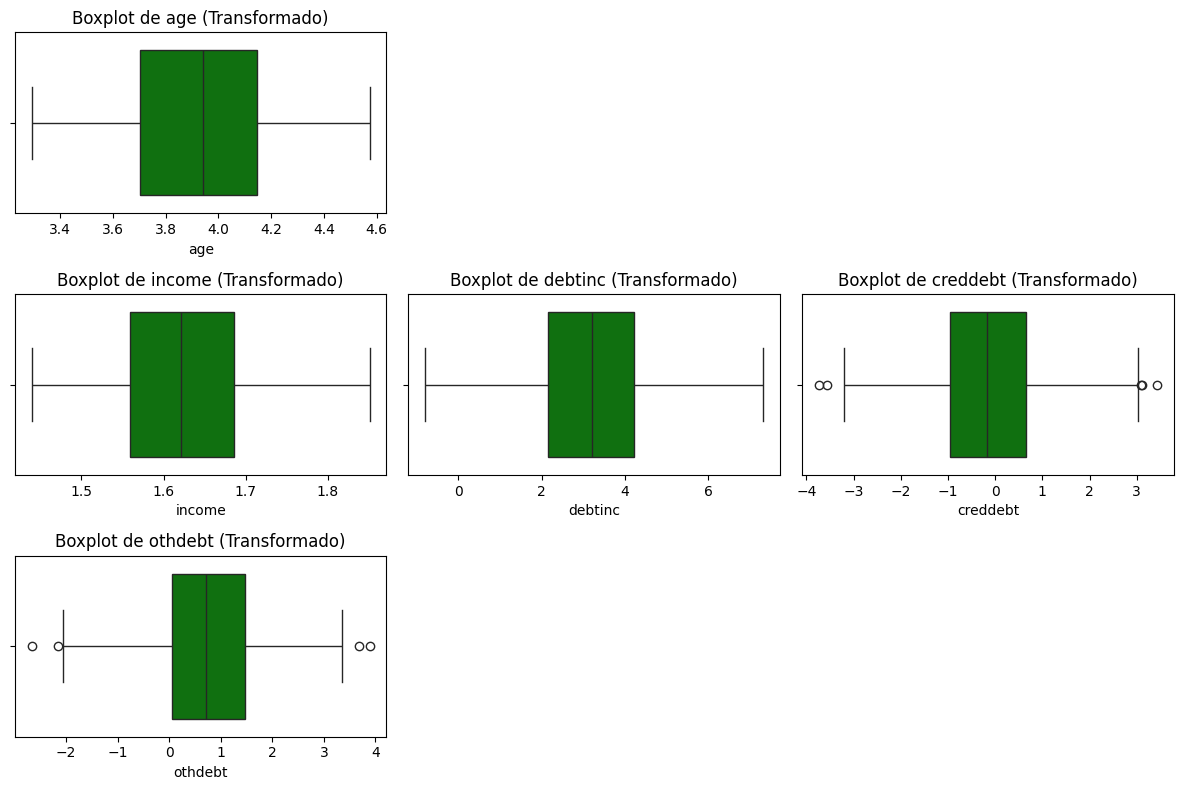

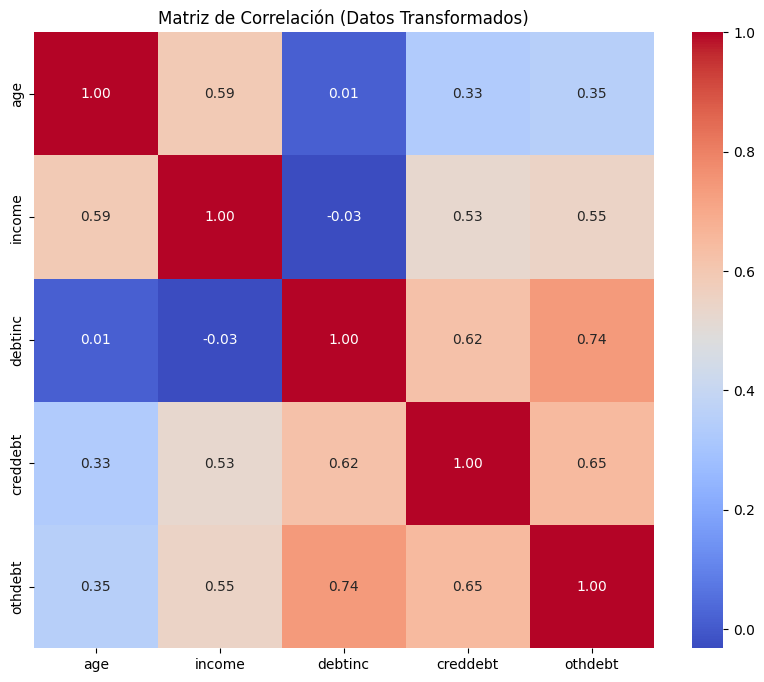

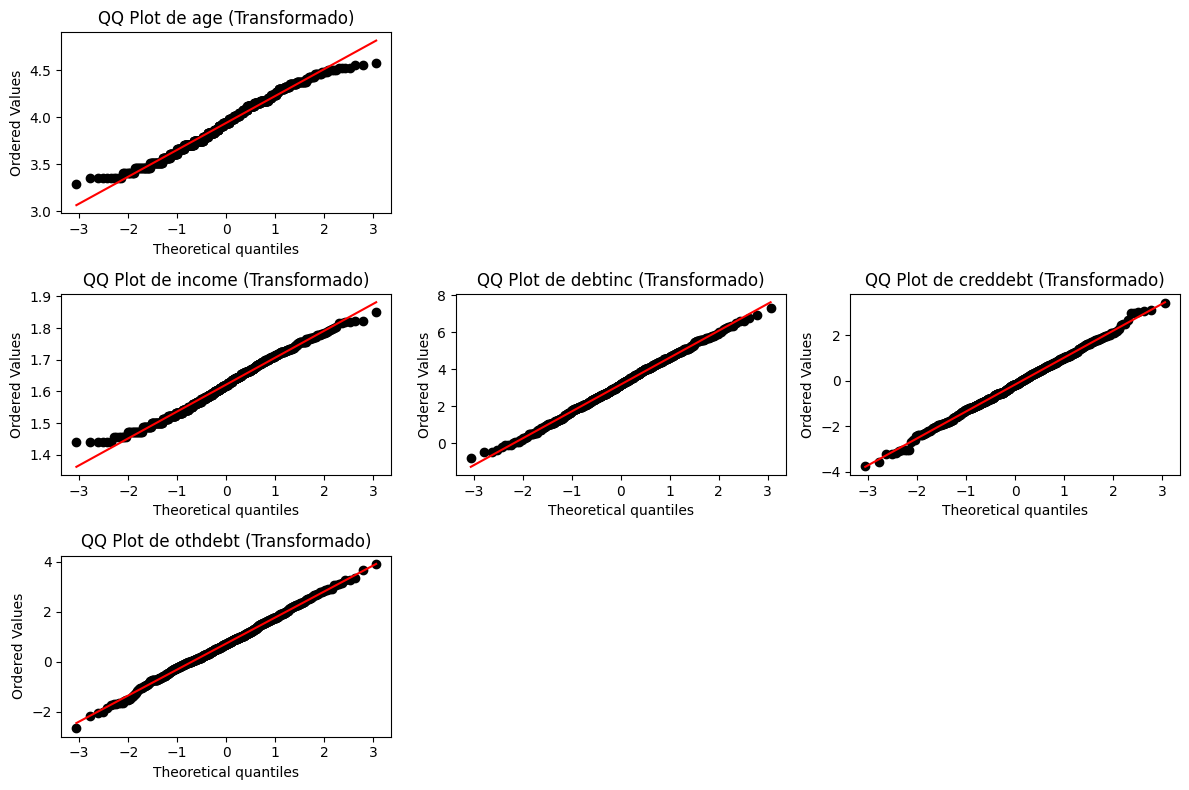

In [11]:
#===============================================================================

#                            TRANSFORMACIÓN BOXCOX

#===============================================================================

transformed_data = {}
lambdas = {}

for col in numerical_columns:
    if df[col].min() > 0:
        transformed_data[col], lambda_value = boxcox(df[col].dropna())
        lambdas[col] = lambda_value
    else:
        print(f'La columna {col} contiene valores negativos, no se puede aplicar la transformación Box-Cox.')


#===============================================================================
#                 PRUEBAS DE NORMALIDAD SOBRE DATOS ORI Y TRANS
#===============================================================================

shapiro_df = {'Variable': [], 'Estadístico_Original': [], 'p_Original': [], 'Estadístico_BoxCox': [], 'p_BoxCox': [], 'Lambda': []}
anderson_df = {'Variable': [], 'Estadístico_Original': [], 'Estadístico_BoxCox': [], 'Niveles_Significancia': [], 'Valores_Críticos': [], 'Interpretación_Original': [], 'Interpretación_BoxCox': []}
ks_df = {'Variable': [], 'Estadístico_Original': [], 'p_Original': [], 'Estadístico_BoxCox': [], 'p_BoxCox': [], 'Interpretación_Original': [], 'Interpretación_BoxCox': []}

for col in numerical_columns:
    if df[col].min() > 0:
        original = df[col].dropna()
        transformed = transformed_data[col]

        # Shapiro-Wilk

        stat_orig, p_orig = shapiro(original)
        stat_box, p_box = shapiro(transformed)

        shapiro_df['Variable'].append(col)
        shapiro_df['Estadístico_Original'].append(round(stat_orig, 3))
        shapiro_df['p_Original'].append(round(p_orig, 3))
        shapiro_df['Estadístico_BoxCox'].append(round(stat_box, 3))
        shapiro_df['p_BoxCox'].append(round(p_box, 3))
        shapiro_df['Lambda'].append(round(lambdas[col], 3))

        # Anderson-Darling

        a_orig = anderson(original)
        a_box = anderson(transformed)

        niveles_significancia = a_orig.significance_level
        valores_criticos = a_orig.critical_values

        # Interpretación de Anderson-Darling
        anderson_interpret_orig = ['Rechazar H0' if a_orig.statistic > crit else 'No rechazar H0' for crit in valores_criticos]
        anderson_interpret_box = ['Rechazar H0' if a_box.statistic > crit else 'No rechazar H0' for crit in valores_criticos]

        anderson_df['Variable'].append(col)
        anderson_df['Estadístico_Original'].append(round(a_orig.statistic, 3))
        anderson_df['Estadístico_BoxCox'].append(round(a_box.statistic, 3))
        anderson_df['Niveles_Significancia'].append([f"{nivel}%" for nivel in niveles_significancia])
        anderson_df['Valores_Críticos'].append([round(valor, 3) for valor in valores_criticos])
        anderson_df['Interpretación_Original'].append(anderson_interpret_orig)
        anderson_df['Interpretación_BoxCox'].append(anderson_interpret_box)

        # Kolmogorov-Smirnov

        ks_stat_orig, ks_p_orig = kstest(original, 'norm')
        ks_stat_box, ks_p_box = kstest(transformed, 'norm')

        # Interpretación de Kolmogorov-Smirnov
        ks_interpret_orig = 'Rechazar H0' if ks_p_orig < 0.05 else 'No rechazar H0'
        ks_interpret_box = 'Rechazar H0' if ks_p_box < 0.05 else 'No rechazar H0'

        ks_df['Variable'].append(col)
        ks_df['Estadístico_Original'].append(round(ks_stat_orig, 3))
        ks_df['p_Original'].append(round(ks_p_orig, 3))
        ks_df['Estadístico_BoxCox'].append(round(ks_stat_box, 3))
        ks_df['p_BoxCox'].append(round(ks_p_box, 3))
        ks_df['Interpretación_Original'].append(ks_interpret_orig)
        ks_df['Interpretación_BoxCox'].append(ks_interpret_box)

    else:
        print(f"La columna {col} contiene valores negativos, no se puede aplicar Box-Cox ni realizar pruebas.")

# Convertir a DataFrames
df_shapiro = pd.DataFrame(shapiro_df)
df_anderson = pd.DataFrame(anderson_df)
df_ks = pd.DataFrame(ks_df)

# Mostrar los resultados como tablas
print("\nResultados Shapiro-Wilk (Original vs. Box-Cox):")
display(df_shapiro)

print("\nResultados Anderson-Darling (Estadístico):")
display(df_anderson)

print("\nResultados Kolmogorov-Smirnov (Original vs. Box-Cox):")
display(df_ks)

#===============================================================================
#                           GRÁFICAS DE COMPARACIÓN
#===============================================================================

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    if df[col].min() > 0:
        plt.subplot(3, 3, i)

        # GRÁFICAR LOS DATOS ORIGINALES
        sns.kdeplot(df[col], color='black', label='Original', fill=True)

        # GRÁFICAR LOS DATOS TRANSFORMADOS
        sns.kdeplot(transformed_data[col], color='green', label='Transformado (Box-Cox)', fill=True)

        plt.title(f'Comparación de {col}')
        plt.legend()

plt.tight_layout()

print('-' * 80)
print('\n')

plt.show()

print('-' * 80)
print('\n')

# ******************************************************************************

#                                  *** EDA ***

# ******************************************************************************

#===============================================================================
#               VISUALIZACIÓN: BOXPLOTS PARA COLUMNAS NUMÉRICAS
#===============================================================================

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    if df[col].min() > 0:
        plt.subplot(3, 3, i)

        sns.boxplot(x=transformed_data[col], color='green')

        plt.title(f'Boxplot de {col} (Transformado)')
        plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()

#===============================================================================
#              VISUALIZACIÓN: MATRIZ DE CORRELACIÓN Y MAPA DE CALOR
#===============================================================================

correlacion_bc = pd.DataFrame(transformed_data).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_bc, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación (Datos Transformados)')
plt.show()

#===============================================================================
#              PRUEBAS DE NORMALIDAD (SW, AD, KS) Y QQPLOT
#===============================================================================

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    if df[col].min() > 0:
        plt.subplot(3, 3, i)

        stats.probplot(transformed_data[col], dist="norm", plot=plt)

        plt.title(f'QQ Plot de {col} (Transformado)')
        plt.gca().get_lines()[0].set_color('black')


plt.tight_layout()
plt.show()


#VIF REGRESION MULTIPLE

In [12]:
#===============================================================================

#                        TRANSFORMACIÓN LOGARITMICA

#===============================================================================

#columnas_a_transformar = ['income', 'age']

#def pruebas_de_normalidad(df, title=''):
#    results = {}
#    for col in df.columns:
#      shapiro = stats.shapiro(df[col])[1]
#      anderson = stats.anderson(df[col]).statistic
#      kolmogorov = stats.kstest(df[col], 'norm')[1]
#      results[col] = {
#          'Shapiro-Wilk': shapiro,
#          'Anderson-Darling': anderson,
#          'Kolmogorov-Smirnov': kolmogorov
#      }

#    print(f'\nResultados de pruebas de normalidad {title}:')
#    print(pd.DataFrame(results).T)
#    print('-' * 80)

# Pruebas de normalidad antes de la transformación

#pruebas_de_normalidad(df[columnas_a_transformar], title="Antes de la Transformación Logarítmica")

# Aplicamos transformación logarítmica (log(x + 1) para evitar log(0))
#df_transformed = df.copy()
#for col in columnas_a_transformar:
#    df_transformed[col] = np.log1p(df[col])  # log(x+1)

# Pruebas de normalidad después de la transformación
#pruebas_de_normalidad(df_transformed[columnas_a_transformar], title="Después de la Transformación Logarítmica")
